西瓜数据集3.0:

       密度    含糖率   好瓜
0   0.697  0.460  1.0
1   0.774  0.376  1.0
2   0.634  0.264  1.0
3   0.608  0.318  1.0
4   0.556  0.215  1.0
5   0.403  0.237  1.0
6   0.481  0.149  1.0
7   0.437  0.211  1.0
8   0.666  0.091  0.0
9   0.243  0.267  0.0
10  0.245  0.057  0.0
11  0.343  0.099  0.0
12  0.639  0.161  0.0
13  0.657  0.198  0.0
14  0.360  0.370  0.0
15  0.593  0.042  0.0
16  0.719  0.103  0.0


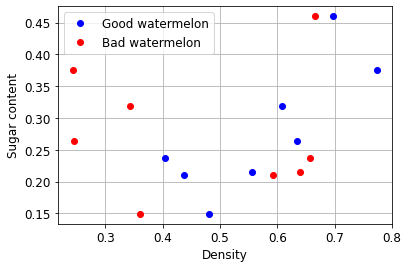

epoch=0, cost=0.6931471805599453
epoch=100, cost=0.6917573610176977
epoch=200, cost=0.6905053120324196
epoch=300, cost=0.6893280334869669
epoch=400, cost=0.6881932254592896
epoch=500, cost=0.6870843103821248
epoch=600, cost=0.6859927623632054
epoch=700, cost=0.6849141794438692
epoch=800, cost=0.6838462722671907
epoch=900, cost=0.6827878339547079
epoch=1000, cost=0.6817382124390821
epoch=1100, cost=0.6806970401394229
epoch=1200, cost=0.6796640954608567
epoch=1300, cost=0.678639231829937
epoch=1400, cost=0.6776223413330632
epoch=1500, cost=0.6766133360853751
epoch=1600, cost=0.6756121386849918
epoch=1700, cost=0.6746186773227397
epoch=1800, cost=0.6736328832773736
epoch=1900, cost=0.6726546896330612
epoch=2000, cost=0.6716840306230527
epoch=2100, cost=0.6707208412940843
epoch=2200, cost=0.6697650573350055
epoch=2300, cost=0.6688166149894494
epoch=2400, cost=0.6678754510114556
epoch=2500, cost=0.6669415026430168
epoch=2600, cost=0.6660147076027668
epoch=2700, cost=0.6650950040803054
epoch

In [2]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# author: 徐聪
# datetime: 2022-10-04 21:17
# software: PyCharm

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


class LogisticModel:
    def __init__(self):
        pass

    def h_theta(self, X, theta):
        """
        计算逻辑回归定义式
        :param X: 特征向量
        :param theta: 参数
        :return:
        """
        return self.sigmoid(np.dot(X, theta.T))

    def train(self, x, y, alpha, epochs):
        """
        对数回归模型训练函数
        :param x: 特征向量
        :param y: 标记
        :param alpha: 学习率
        :param epochs: 训练次数
        :return:
        """
        # 初始化参数以及数据
        num_train, num_feature = x.shape
        X = np.append(np.ones((num_train, 1)), x, axis=1)
        theta = np.zeros((1, num_feature + 1))
        cost_list = []

        # 训练模型
        for epoch in range(epochs):
            h_theta_x = self.h_theta(X, theta)
            # 损失值
            cost = -1 / num_train * np.sum(y * np.log(h_theta_x) + (1 - y) * np.log(1 - h_theta_x))
            # 计算theta偏导
            d_theta = 1 / num_train * np.sum((h_theta_x - y) * X, axis=0)
            # 更新theta
            theta = theta - alpha * d_theta

            if epoch % 100 == 0:
                cost_list.append(cost)
                print(f"epoch={epoch}, cost={cost}")

        return theta, cost_list

    def predict(self, x, theta):
        """
        二分类模型预测
        :param x: 特征向量
        :param theta: 参数
        :return:
        """
        num_predict, num_feature = x.shape
        X = np.append(np.ones((num_predict, 1)), x, axis=1)
        y_predict = self.h_theta(X, theta)
        for i in range(len(y_predict)):
            if y_predict[i] > 0.5:
                y_predict[i] = 1
            else:
                y_predict[i] = 0
        return y_predict

    def sigmoid(self, x):
        """
        定义sigmoid函数
        :param x:
        :return:
        """
        return 1 / (1 + np.exp(-x))

    def multi_predict(self, x, theta_list):
        """
        多分类器预测
        :param x: 特征向量
        :param theta_list: 参数
        :return:
        """
        num_predict, num_feature = x.shape
        X = np.append(np.ones((num_predict, 1)), x, axis=1)

        Y_predict = self.h_theta(X, theta_list[0])
        y_predict = np.ones((num_predict, 1))
        for theta in theta_list[1:]:
            Y_predict = np.append(Y_predict, self.h_theta(X, theta), axis=1)

        # print(Y_predict)

        for i in range(num_predict):
            y_predict[i] = np.argmax(Y_predict[i, :])
        return y_predict

    def multi_train(self, x, y, alpha, epochs):
        """
        多分类器训练
        :param x: 特征向量
        :param y: 标签
        :param alpha: 学习率
        :param epochs: 训练次数
        :return:
        """
        # 获取数据集参数
        sort_list = np.unique(y)
        num_sort = len(sort_list)
        num_train, num_feature = x.shape

        theta_list = []
        cost_list = []
        for i in range(num_sort):
            print(f"==== classifier {sort_list[i]} train begin ====")
            # 获取当前分类label
            sort = sort_list[i]
            # 将当前分类的label变为1，其余变为0
            Y = np.copy(y)
            Y[Y != sort] = -1
            Y[Y == sort] = 1
            Y[Y == -1] = 0

            # 存储参数
            theta, costs = self.train(x, Y, alpha, epochs)
            theta_list.append(theta)
            cost_list.append(costs[-1])

        return theta_list, cost_list


# 初始化设置
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

# 西瓜数据集 3.0
data = np.array(
    [[0.697, 0.460, 1], [0.774, 0.376, 1], [0.634, 0.264, 1], [0.608, 0.318, 1], [0.556, 0.215, 1], [0.403, 0.237, 1],
     [0.481, 0.149, 1], [0.437, 0.211, 1], [0.666, 0.091, 0], [0.243, 0.267, 0], [0.245, 0.057, 0], [0.343, 0.099, 0],
     [0.639, 0.161, 0], [0.657, 0.198, 0], [0.360, 0.370, 0], [0.593, 0.042, 0], [0.719, 0.103, 0]])
label = np.array(["密度", "含糖率", "好瓜"])
cnt, dim = data.shape[0], data.shape[1] - 1
df = pd.DataFrame(data)
df.columns = label
x = data[:, 0:2]
y = data[:, 2].reshape(cnt, 1)

# 绘制图像
print("西瓜数据集3.0:\n")
print(df)
plt.figure()
plt.plot(x[0:8, 0], x[0:8, 1], "bo", label="Good watermelon")
plt.plot(x[8:16, 0], x[0:8, 1], "ro", label="Bad watermelon")
plt.xlabel("Density")
plt.ylabel("Sugar content")
plt.legend()
plt.grid()
plt.show()


# 获取训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 训练模型
lm = LogisticModel()
# theta, cost_list = lm.train(x_train, y_train, 0.05, 1000)
theta, cost_list = lm.train(x, y, 0.01, 5000)

# 模型评估
print(f"params = {theta}")
print(classification_report(y, lm.predict(x, theta)))
